In [1]:
import pandas as pd

df = pd.read_csv('./flight_data_processed.csv')

print(df.tail())


     Departure Airport       Departure Time Arrival Airport  \
7504               DLI  2024-09-21 15:55:00             HAN   
7505               DLI  2024-09-21 07:00:00             HAN   
7506               DLI  2024-09-21 12:10:00             HAN   
7507               DLI  2024-09-21 13:05:00             VII   
7508               SGN  2024-09-21 15:10:00             VCS   

             Arrival Time Carrier Code  Flight Number  Price (VND) Duration  
7504  2024-09-21 17:50:00           QH           1422    3853000.0  PT1H55M  
7505  2024-09-21 08:50:00           W2           4404    3922000.0  PT1H50M  
7506  2024-09-21 14:00:00           W2           4412    3922000.0  PT1H50M  
7507  2024-09-21 14:40:00           A1           2712    5031000.0  PT1H35M  
7508  2024-09-21 16:10:00           VN           1885    9035000.0     PT1H  


In [2]:
df['Routine'] = df['Departure Airport'] + '-' + df['Arrival Airport']

df = df.drop(columns=['Flight Number', 'Duration', 'Departure Airport', 'Arrival Airport', 'Arrival Time'])

df.head()

,Departure Time,Carrier Code,Price (VND),Routine
0,2024-09-15 05:25:00,VJ,1541000.0,SGN-HAN
1,2024-09-15 06:00:00,VJ,1541000.0,SGN-HAN
2,2024-09-15 06:40:00,VJ,1541000.0,SGN-HAN
3,2024-09-15 07:00:00,VJ,1541000.0,SGN-HAN
4,2024-09-15 08:10:00,VJ,1541000.0,SGN-HAN


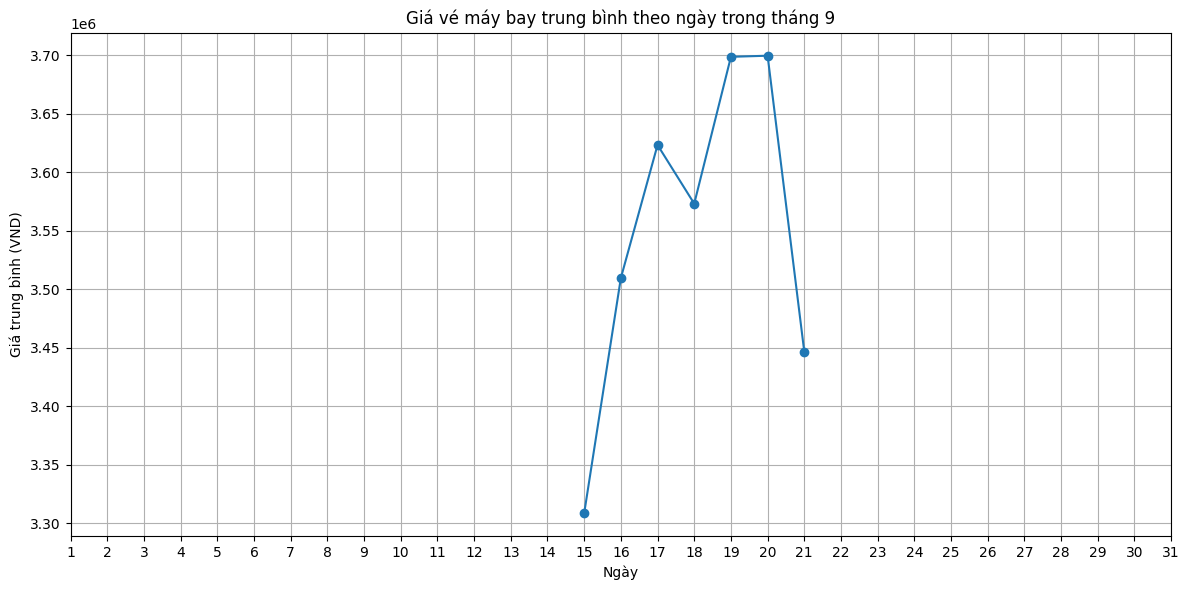

Giá vé trung bình theo ngày trong tháng 9:
   Day   Price (VND)
0   15  3.308466e+06
1   16  3.509517e+06
2   17  3.623226e+06
3   18  3.573072e+06
4   19  3.698562e+06
5   20  3.699503e+06
6   21  3.446379e+06


In [3]:
import matplotlib.pyplot as plt

# Chuyển đổi cột 'Departure Time' thành định dạng datetime nếu chưa được chuyển đổi
df['Departure Time'] = pd.to_datetime(df['Departure Time'])

# Lọc dữ liệu cho tháng 9
df_september = df[df['Departure Time'].dt.month == 9]

# Tạo cột mới 'Day' để lưu trữ ngày của chuyến bay
df_september['Day'] = df_september['Departure Time'].dt.day

# Tính giá trung bình theo ngày
daily_avg_price = df_september.groupby('Day')['Price (VND)'].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_price['Day'], daily_avg_price['Price (VND)'], marker='o')
plt.title('Giá vé máy bay trung bình theo ngày trong tháng 9')
plt.xlabel('Ngày')
plt.ylabel('Giá trung bình (VND)')
plt.xticks(range(1, 32))
plt.grid(True)
plt.tight_layout()
plt.show()

print("Giá vé trung bình theo ngày trong tháng 9:")
print(daily_avg_price)
